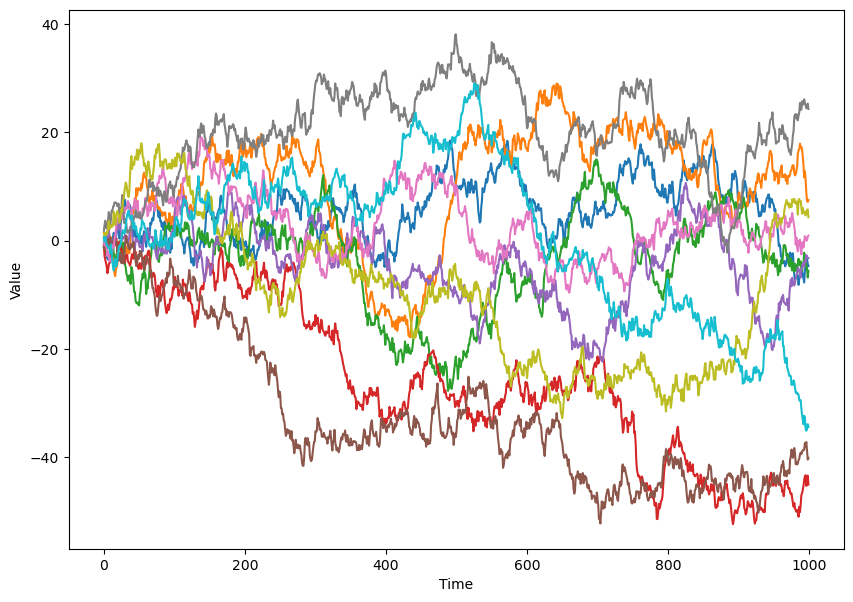

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 10
SAMPLES = 1000

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        s = rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

      Time     Path     Value
0        0  WPath 0  0.715284
1        1  WPath 0  1.402784
2        2  WPath 0  1.635486
3        3  WPath 0  2.783482
4        4  WPath 0  3.417057
...    ...      ...       ...
1995   995  WPath 1  3.743775
1996   996  WPath 1  2.456678
1997   997  WPath 1  0.986268
1998   998  WPath 1  1.132221
1999   999  WPath 1  1.807487

[2000 rows x 3 columns]


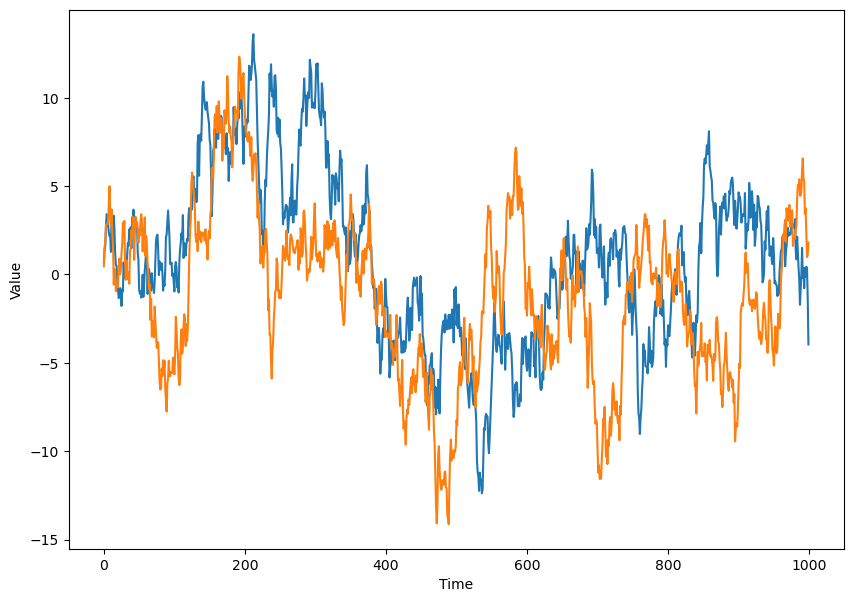

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 2
SAMPLES = 1000
THETA = 0.025
MEAN = 0

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        mean_rev_term = -THETA * (value - MEAN)
        s = mean_rev_term + rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)
print(long_form)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

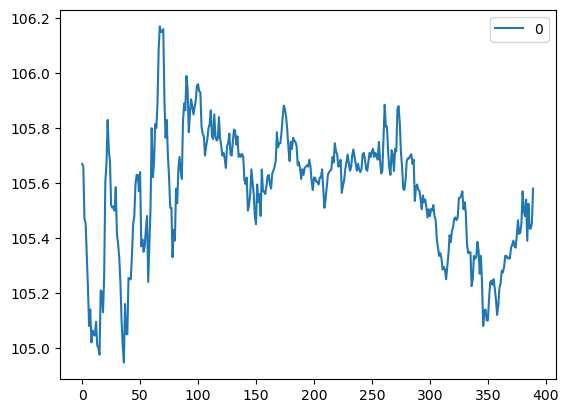

In [8]:
import yfinance

pepsi = yfinance.Ticker("PEP")
cocacola = yfinance.Ticker("KO")

START="2024-10-15"
END="2024-10-16"

pepsi_history = pepsi.history(start=START, end=END, interval="1m")
cocacola_history = cocacola.history(start=START, end=END, interval="1m")

pepsi_close_data = pepsi_history["Close"]
cocacola_close_data = cocacola_history["Close"]

spreads = []
for i in range(len(pepsi_close_data)):
    pepsi_close = pepsi_close_data.iloc[i]
    cocacola_close = cocacola_close_data.iloc[i]
    
    spread = pepsi_close - cocacola_close
    spreads.append(spread)

data = pd.DataFrame(spreads)

sns.lineplot(data=data)
plt.show()

In [9]:
import math
import numpy as np

# calibrate an OU process on the spread

# identify different statistical periods and
# piece them together relative to zero?

# first, we get a mean value to revert to,
# this will be the simple arithmetic mean
# on the dataset, the variance will also
# be derived from the spreads

VARIANCE = np.var(spreads)
MU = sum(spreads) / len(spreads)
EPOCHS = 100

NUM_SPREADS = len(spreads)

def ou_process(theta) -> list[float]:
    value = 0
    values = []

    for _ in range(NUM_SPREADS):
        brownian = rng.normal(MU, VARIANCE)
        mean_reversion = -theta * (value - MU) + math.e
        
        value += mean_reversion + brownian
        values.append(value)

    return values


def ou_calibration():
    theta = 0.05
    
    for _ in range(EPOCHS):
        values = ou_process(theta)

        # compare against spreads and find 
        error = 0
        for index in range(NUM_SPREADS):
            value = values[index]
            spread = spreads[index]

            error += (value - spread) ** 2

        error /= NUM_SPREADS
        print(error)

        # Compute gradient
        


ou_calibration()

        

4333380.998406687
4333362.787295513
4333501.121329154
4333197.469183118
4333314.15381033
4333493.550807344
4333493.343931783
4333092.111806607
4333573.958131864
4333339.031880536
4333132.540231885
4333057.700281481
4333057.108446556
4332911.736875046
4333164.099306434
4333152.017938229
4333320.849466721
4333006.227382494
4333103.14933545
4333170.900371982
4333318.970211839
4333242.082763308
4333211.800709122
4332913.020052947
4333415.552722405
4333051.539844005
4333344.980387651
4333076.30634083
4333320.26404269
4333121.396555008
4333388.967765222
4333138.746195424
4333281.51531598
4333088.287223781
4333069.847641878
4333172.174508329
4333326.932334293
4333302.448356905
4333331.97829885
4333006.426584791
4333215.18813604
4333060.651451307
4333287.27091655
4332791.511277387
4333117.953300406
4333147.74515427
4333090.589505147
4333128.629713667
4333004.829261455
4333210.879708419
4333209.441085322
4333071.1436471855
4333463.791081975
4333061.829316754
4333535.961282286
4333216.774528823
